# Load spectral data from the OpenRAMAN

---
#### Load an individual spectrum

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt

from ramanalysis import RamanSpectra, RamanSpectrum


In [2]:
example_data_directory = Path("../../ramanalysis/tests/example_data/OpenRAMAN")

csv_filepath_sample = next(example_data_directory.glob("*CC-125*.csv"))
csv_filepath_excitation_calibration = next(example_data_directory.glob("*neon*.csv"))
csv_filepath_emission_calibration = next(example_data_directory.glob("*aceto*.csv"))

spectrum = RamanSpectrum.from_openraman_csvfiles(
    csv_filepath_sample,
    csv_filepath_excitation_calibration,
    csv_filepath_emission_calibration,
)

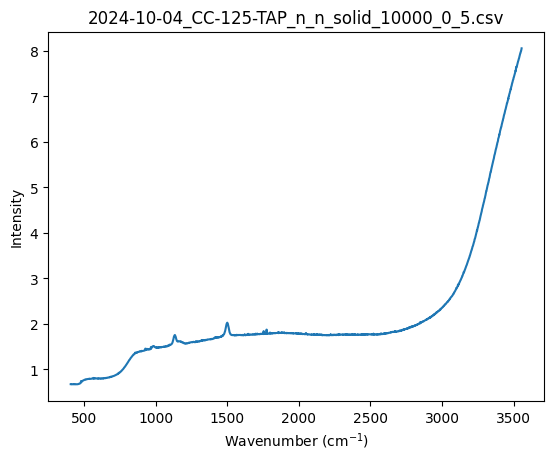

In [3]:
fig, ax = plt.subplots()

ax.plot(spectrum.wavenumbers_cm1, spectrum.intensities)
ax.set_title(csv_filepath_sample.name)
ax.set_xlabel(r"Wavenumber (cm$^{-1}$)")
ax.set_ylabel("Intensity");

---
#### Load a batch of spectra

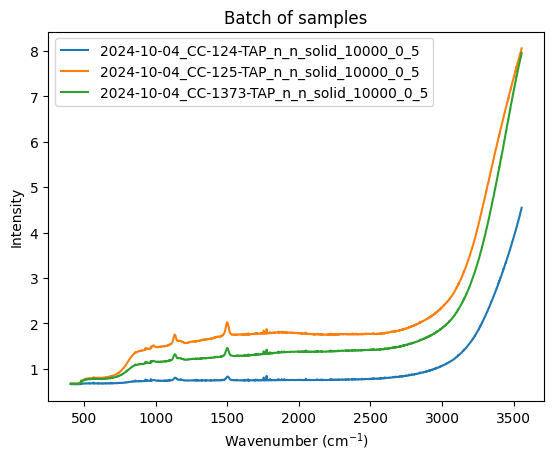

In [4]:
spectra = RamanSpectra.from_input_directory_dirty(
    example_data_directory,
    sample_glob_str="*CC*"
).spectra

fig, ax = plt.subplots()

for sample, spectrum in spectra.items():
    ax.plot(spectrum.wavenumbers_cm1, spectrum.intensities, label=sample)

ax.legend()
ax.set_title("Batch of samples")
ax.set_xlabel(r"Wavenumber (cm$^{-1}$)")
ax.set_ylabel("Intensity");